## Wordcloud 만들기

- 추출된 352명 선수의 comment에 대한 wordcloud

In [19]:
#데이터 불러오기

from konlpy.tag import Okt
from collections import Counter
import timeit

from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib
from IPython.display import set_matplotlib_formats

matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)


In [ ]:

file = open('comment.txt', 'r', encoding='utf-8')  #파일 open
lists = file.readlines()  #파일 읽기
file.close()

In [ ]:
# 형태소 분석

start = timeit.default_timer()

okt = Okt()   #Okt 형태소
morphs = []
for sentence in lists: 
    morphs.append(okt.pos(sentence))  #어근, 품사 확인 후 morphs에 추가

print(morphs)

end = timeit.default_timer()
(end - start)   #걸리는 시간 기록

In [ ]:
#명사, 동사, 형용사 품사만 선별

noun_adj_adv_list=[]
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun', 'Verb', 'Adjective']:
            noun_adj_adv_list.append(word)

print(noun_adj_adv_list)


In [ ]:
#빈도수대로 정렬

count = Counter(noun_adj_adv_list)

words = dict(count.most_common())

print(words)

In [ ]:
#불용어 사전 (stopword) 불러오기
with open('./koreanStopwords.txt', encoding= ' utf-8') as file:
    stop_words = list()
    
    for f in file:
        stop_words.append(f[:-1])   #\n 문자 제거
    print(stop_words)

In [ ]:
#불용어 제거
[words.pop(key, None) for key in stop_words]
print(words)


In [ ]:
#wordcloud 생성

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',colormap = "Accent_r", 
                      width=2000, height=1200, max_words=100).generate_from_frequencies(words)
wordcloud.to_file('word_cloud.png')  #png로 저장

plt.imshow(wordcloud)
plt.axis('off')
plt.show()




## ------------------------------------------------------------------------------

## position 별 wordcloud 생성

In [7]:
#데이터 불러오기

import pandas as pd
extracted_df = pd.read_csv('data/extracted_df.csv', encoding='cp949')

In [8]:
#position별 선수 선별

FW_df = extracted_df[extracted_df['position'] == 'FW']
MF_df = extracted_df[extracted_df['position'] == 'MF']
DF_df = extracted_df[extracted_df['position'] == 'DF']

In [ ]:
#특수문자 제거

import re

FW_df['comment'] = FW_df['comment'].apply(lambda x : re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', x))
MW_df['comment'] = MW_df['comment'].apply(lambda x : re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', x))
DF_df['comment'] = DF_df['comment'].apply(lambda x : re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', x))

In [20]:
#position별 comment의 list 생성 함수

def make_comment_list(position_df):
    position_list = []
    
    for i in position_df['comment']:
        position_list.append(i)
    
    return position_list

In [34]:
#wordcloud 생성 함수

def make_wordcloud(position_list):
    
    print('wordcloud 만드는중...')
    
    start = timeit.default_timer()

    
    #형태소 분석
    okt = Okt()
    morphs = []
    
    for sentence in position_list:
        morphs.append(okt.pos(sentence))
    
    #명사, 동사, 형용사 품사만 선별
    noun_adj_adv_list = []
    for sentence in morphs:
        for word, tag in sentence:
            if tag in ['Noun', 'Verb', 'Adjective']:
                noun_adj_adv_list.append(word)
    
    #빈도수대로 정렬
    count = Counter(noun_adj_adv_list)
    words = dict(count.most_common())
    
    #불용어 제거
    [words.pop(key, None) for key in stop_words]
#     print(words)
    
    
    #wordcloud 생성
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',colormap = "Accent_r", 
                      width=2000, height=1200, max_words=100).generate_from_frequencies(words)
    
    wordcloud.to_file('wordcloud.png')  #png로 저장

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
    end = timeit.default_timer()
    (end - start)   #걸리는 시간 기록

In [24]:
#불용어 사전 (stopword) 불러오기
with open('./koreanStopwords.txt', encoding= ' utf-8') as file:
    stop_words = list()
    
    for f in file:
        stop_words.append(f[:-1])   #\n 문자 제거
    print(stop_words)

['팜', '삼', 'ㅍ', 'ㅍㅍ', 'ㅍㅍㅍ', 'ㅍㅍㅍㅍ', 'ㅍㅍㅍㅍㅍ', 'ㅍㅍㅍㅍㅍㅍ', 'ㅍㅍㅍㅍㅍㅍㅍ', 'ㅅ', 'ㅅㅅ', 'ㅅㅅㅅ', 'ㅅㅅㅅㅅ', 'ㅅㅅㅅㅅㅅ', 'ㅅㅅㅅㅅㅅㅅ', 'ㅅㅅㅅㅅㅅㅅㅅ', '거래', '구해요', '거래합니다', '거래하실분', '판다', '산다', '급처', 'ㅋ', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤\t', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개\t', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다

## wordcloud 생성

#### FW vs MF vs DF 포지션별 wordcloud 표현

- 한 선수가 여러 포지션에 등록되어 있는 경우가 많음
- 그 포지션에 맞는 comment를 달았을 것이라고 생각해서 따로 정제하지 않음
- 거래를 원하는 (ex:판다, 산다 등...) 의 comment는 제거해야 정확한 평가를 할 수 있다고 판단

### FW position wordcloud

wordcloud 만드는중...


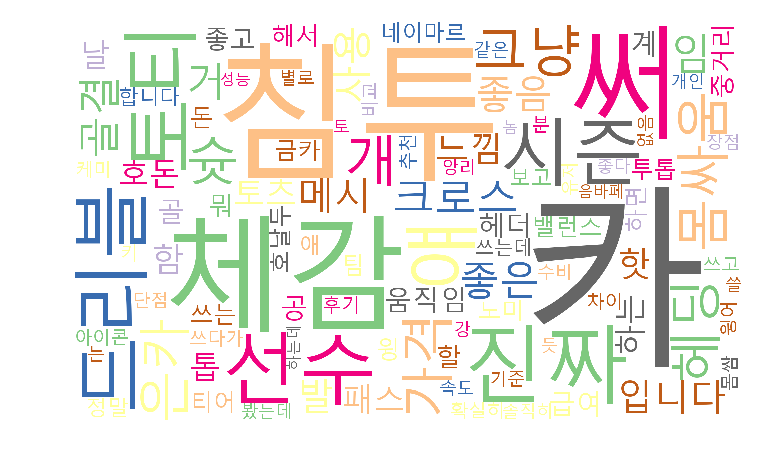

In [35]:
make_wordcloud(make_comment_list(FW_df))

## MF position wordcloud

wordcloud 만드는중...


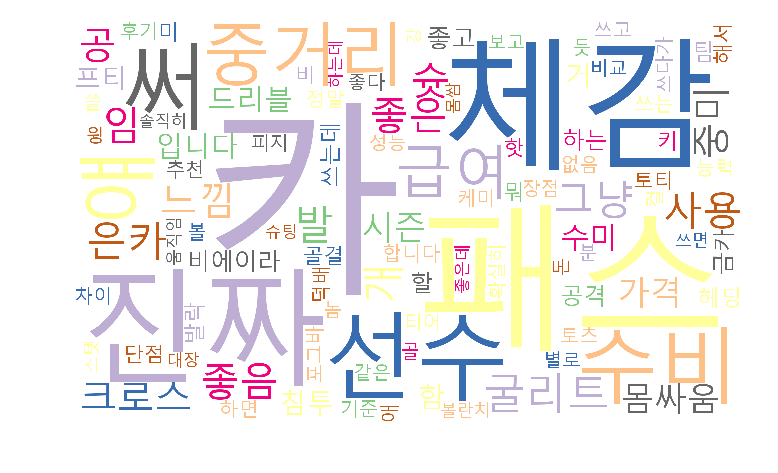

In [36]:
make_wordcloud(make_comment_list(MF_df))

## DF position wordcloud

wordcloud 만드는중...


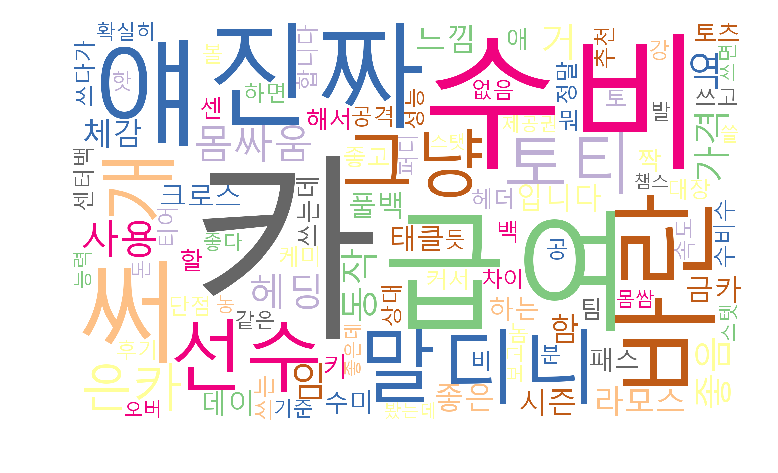

In [37]:
make_wordcloud(make_comment_list(DF_df))